In [3]:
%run CommonCodeForExperiments.ipynb

In [4]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
aitia = App()

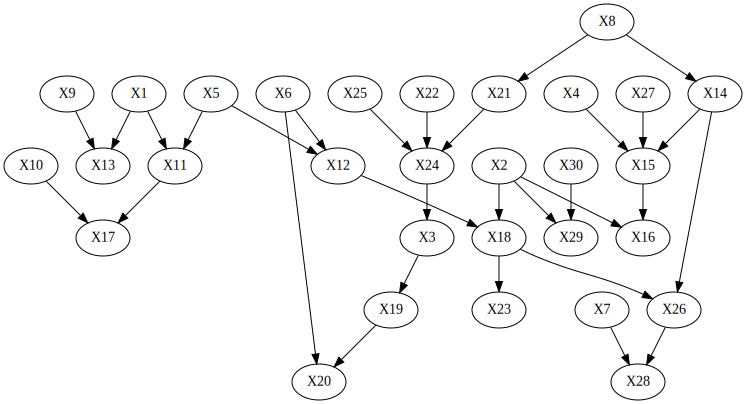

In [5]:
random_scm1 = aitia.data.random_scm_treatment_outcome()
random_scm1.cgm.draw()

In [6]:
df = random_scm1.sample(2000)
df

,X30,X27,X25,X22,X10,X9,X8,X21,X24,X3,...,X29,X18,X26,X28,X23,X16,X1,X13,X11,X17
0,0.128353,-1.430151,0.779897,0.557820,-0.561404,0.680189,0.026099,-0.218390,-1.572395,-1.335311,...,-0.468124,0,0.601390,-0.254804,1.405325,2.272144,-0.165000,0.724403,-0.311391,-1.329222
1,0.807695,1.876938,1.022563,-0.437270,-1.436234,0.654417,-0.056452,-0.146084,0.506469,-0.069854,...,0.236811,0,2.548984,2.150197,-0.664008,-2.056683,-0.549216,0.532164,-0.267517,0.274425
2,-1.477417,-0.309888,-1.612852,-0.155391,-1.702815,-0.628592,-0.836766,-0.721009,-2.060067,-1.412910,...,-2.368875,0,1.283666,1.910834,-1.001644,1.340154,-0.474259,-0.314279,0.346864,2.167339
3,-0.588745,0.538067,1.492905,0.135157,1.140705,0.347413,-0.280541,1.263992,1.313474,0.358307,...,1.808507,0,-1.162424,0.602287,0.263689,-0.494702,-0.022988,-0.285594,0.476778,0.318792
4,-1.516186,-0.244473,-0.262256,-0.329066,-0.589287,-0.564618,-0.307584,0.523216,1.035735,1.427487,...,-0.160702,1,1.339416,0.937202,-1.311369,-2.417326,-0.597767,-1.854510,0.604907,-0.940164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.096913,-0.417281,-0.451516,-0.088494,0.165801,-1.992487,-0.200463,-0.768367,0.999346,0.930864,...,2.568120,1,0.305210,-0.206964,-0.070759,0.278766,-0.290603,-1.664654,1.090334,-0.875855
1996,-1.193591,-1.602991,-1.185288,-0.713341,-1.751986,-0.643050,0.217652,-0.468305,-0.725656,-1.884305,...,-0.902867,0,-0.036255,0.044146,-0.812266,0.513315,1.076167,1.704830,-0.380441,0.003856
1997,0.622175,0.020860,-1.461641,-0.423413,-0.045106,-1.150584,0.978075,-0.104376,-1.221217,-1.789620,...,-1.724247,0,0.608999,0.379128,-1.444764,-0.909641,-0.325614,1.536215,-0.934489,0.543439
1998,1.322458,1.499132,1.077048,0.778281,-0.324029,-2.566526,-0.219801,-0.219500,-0.359994,-0.056268,...,1.402313,0,-1.058237,-0.701176,-0.309700,-0.315693,0.284888,-0.422618,0.947011,2.548757


In [8]:
nx.write_gml(random_scm1.cgm.dag, "./random1.gml")

In [9]:
# Create a causal model from the data and given common causes.
xs = ""
for i in range(1,20):
    xs += ("x"+str(i)+"+")
model=CausalModel(
        data = df,
        graph="./random1.gml",
        treatment='X12',
        outcome='X18',
        common_causes=xs.split('+'))

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X12'] on outcome ['X18']


In [10]:
#Identify the causal effect
identified_estimand = model.identify_effect()

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] n


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['X6', 'X5']


In [11]:
# Estimate the causal effect and compare it with Average Treatment Effect
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True
)

print(estimate)

print("Causal Estimate is " + str(estimate.value))
data_1 = df[df["X12"]==1]
data_0 = df[df["X12"]==0]

print("ATE", np.mean(data_1["X18"])- np.mean(data_0["X18"]))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: X18~X12+X12*X2


                            OLS Regression Results                            
Dep. Variable:                    X18   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     96.77
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           7.74e-41
Time:                        15:45:29   Log-Likelihood:                -1359.1
No. Observations:                2000   AIC:                             2724.
Df Residuals:                    1997   BIC:                             2741.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4940      0.015     32.798      0.0

In [30]:
df_cfd = df.drop(['X3', 'X6', 'X2', 'X4', 'X11', 'X7', 'X9', 'X19', 'X10', 'X1'], axis=1)

In [31]:
# Create a causal model from the data and given common causes.
xs = ""
for i in range(1,20):
    xs += ("x"+str(i)+"+")
model=CausalModel(
        data = df_cfd,
        treatment='X12',
        outcome='X18',
        common_causes=xs.split('+'))

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X12'] on outcome ['X18']


In [32]:
#Identify the causal effect
identified_estimand = model.identify_effect()

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['', 'x3', 'x6', 'x2', 'x18', 'x4', 'x11', 'x7', 'x9', 'x19', 'x10', 'x1', 'x12', 'x13', 'x5', 'x15', 'x8', 'x17', 'x14', 'x16']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] n


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


In [33]:
# Estimate the causal effect and compare it with Average Treatment Effect
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True
)

print(estimate)

print("Causal Estimate is " + str(estimate.value))
data_1 = df[df["X12"]==1]
data_0 = df[df["X12"]==0]

print("ATE", np.mean(data_1["X18"])- np.mean(data_0["X18"]))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: X18~X12


                            OLS Regression Results                            
Dep. Variable:                    X18   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5132
Date:                Fri, 26 Jun 2020   Prob (F-statistic):              0.474
Time:                        16:00:20   Log-Likelihood:                -1451.3
No. Observations:                2000   AIC:                             2907.
Df Residuals:                    1998   BIC:                             2918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4940      0.016     31.328      0.0

In [34]:
def get_clustered_dataframe(incoming_df, column_list, sample_size):
    gmm = mixture.BayesianGaussianMixture(n_components=2, 
                                          covariance_type="full", 
                                          n_init=100, 
                                          random_state=42).fit(incoming_df)
    clustered_data = gmm.sample(sample_size)
    clustered_df = pd.DataFrame(clustered_data[0], columns=column_list)
    return clustered_df

df_clustered = get_clustered_dataframe(df_cfd, list(df_cfd), 2000)

In [35]:
# Create a causal model from the data and given common causes.
xs = ""
for i in range(1,20):
    xs += ("x"+str(i)+"+")
model=CausalModel(
        data = df_clustered,
        treatment='X12',
        outcome='X18',
        common_causes=xs.split('+'))

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X12'] on outcome ['X18']


In [36]:
#Identify the causal effect
identified_estimand = model.identify_effect()

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['', 'x3', 'x6', 'x2', 'x18', 'x4', 'x11', 'x7', 'x9', 'x19', 'x10', 'x1', 'x12', 'x13', 'x5', 'x15', 'x8', 'x17', 'x14', 'x16']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] n


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


In [37]:
# Estimate the causal effect and compare it with Average Treatment Effect
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True
)

print(estimate)

print("Causal Estimate is " + str(estimate.value))
data_1 = df[df["X12"]==1]
data_0 = df[df["X12"]==0]

print("ATE", np.mean(data_1["X18"])- np.mean(data_0["X18"]))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: X18~X12


                            OLS Regression Results                            
Dep. Variable:                    X18   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02489
Date:                Fri, 26 Jun 2020   Prob (F-statistic):              0.875
Time:                        16:01:19   Log-Likelihood:                -1499.8
No. Observations:                2000   AIC:                             3004.
Df Residuals:                    1998   BIC:                             3015.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4983      0.016     31.245      0.0